In [3]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [4]:
# Define the data directory
data_dir = '../data/PlantVillage'

# Set up data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Create training and validation generators
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Print class names
print("Classes:", train_generator.class_indices)

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.
Classes: {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 'Tomato_Spider_mites_Two_spotted_spider_mite': 10, 'Tomato__Target_Spot': 11, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12, 'Tomato__Tomato_mosaic_virus': 13, 'Tomato_healthy': 14}


/usr/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │       376,335 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 617,167 (2.35 MB)

 Trainable params: 617,167 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3402 - loss: 2.0155

/usr/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


516/516 ━━━━━━━━━━━━━━━━━━━━ 634s 1s/step - accuracy: 0.3405 - loss: 2.0146 - val_accuracy: 0.6758 - val_loss: 1.0004
Epoch 2/15
  1/516 ━━━━━━━━━━━━━━━━━━━━ 9:06 1s/step - accuracy: 0.6250 - loss: 0.8279

/usr/lib/python3.13/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


516/516 ━━━━━━━━━━━━━━━━━━━━ 61s 117ms/step - accuracy: 0.6250 - loss: 0.8279 - val_accuracy: 0.6650 - val_loss: 1.0047
Epoch 3/15
516/516 ━━━━━━━━━━━━━━━━━━━━ 693s 1s/step - accuracy: 0.6939 - loss: 0.9189 - val_accuracy: 0.7896 - val_loss: 0.6204
Epoch 4/15
516/516 ━━━━━━━━━━━━━━━━━━━━ 73s 141ms/step - accuracy: 0.7812 - loss: 0.5732 - val_accuracy: 0.7690 - val_loss: 0.6706
Epoch 5/15
516/516 ━━━━━━━━━━━━━━━━━━━━ 719s 1s/step - accuracy: 0.7850 - loss: 0.6304 - val_accuracy: 0.8423 - val_loss: 0.4686
Epoch 6/15
516/516 ━━━━━━━━━━━━━━━━━━━━ 69s 132ms/step - accuracy: 0.7500 - loss: 0.7280 - val_accuracy: 0.8491 - val_loss: 0.4571
Epoch 7/15
516/516 ━━━━━━━━━━━━━━━━━━━━ 716s 1s/step - accuracy: 0.8318 - loss: 0.4994 - val_accuracy: 0.8713 - val_loss: 0.3952
Epoch 8/15
516/516 ━━━━━━━━━━━━━━━━━━━━ 77s 148ms/step - accuracy: 0.9375 - loss: 0.3489 - val_accuracy: 0.8625 - val_loss: 0.4141
Epoch 9/15
516/516 ━━━━━━━━━━━━━━━━━━━━ 714s 1s/step - accuracy: 0.8584 - loss: 0.4112 - val_accurac

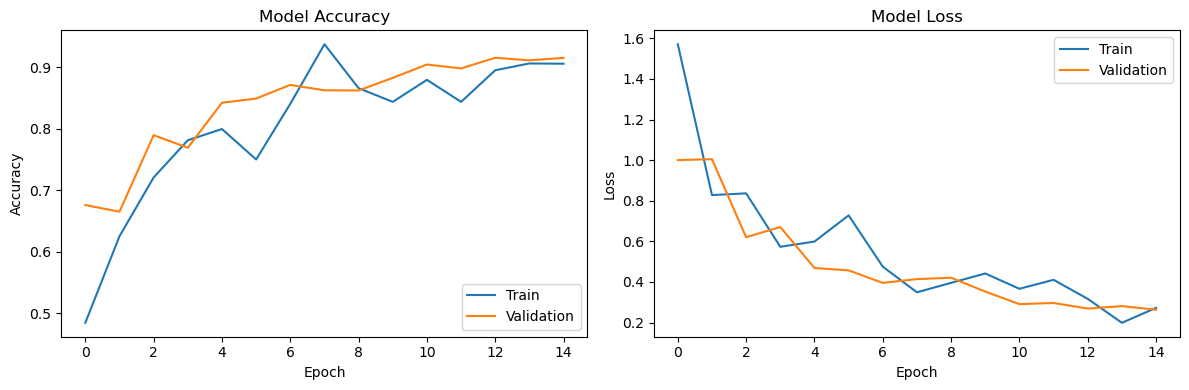

129/129 ━━━━━━━━━━━━━━━━━━━━ 64s 493ms/step - accuracy: 0.9076 - loss: 0.2683
Validation accuracy: 0.9129
Validation loss: 0.2605
Found 20638 images belonging to 15 classes.
645/645 ━━━━━━━━━━━━━━━━━━━━ 228s 353ms/step - accuracy: 0.9129 - loss: 0.2525
Test accuracy: 0.9071
Test loss: 0.2712
645/645 ━━━━━━━━━━━━━━━━━━━━ 226s 350ms/step

Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.98      0.92      0.95       997
                     Pepper__bell___healthy       0.96      0.98      0.97      1478
                      Potato___Early_blight       0.94      0.99      0.97      1000
                       Potato___Late_blight       0.93      0.84      0.88      1000
                           Potato___healthy       0.46      0.97      0.62       152
                      Tomato_Bacterial_spot       0.99      0.93      0.96      2127
                        Tomato_Early_bligh

In [8]:
# Define the model architecture with regularization to prevent overfitting

from keras.src.layers import Dropout

# Create a CNN model for plant disease classification
model = tf.keras.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Third convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Fourth convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten and dense layers
    tf.keras.layers.Flatten(),
    Dropout(0.5),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=15,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Validation loss: {val_loss:.4f}")



test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Make predictions on test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(true_classes, predicted_classes)

# Display classification report
class_names = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))




In [9]:
# Save the model
model.save('../models/plant_disease_model.h5')
print("Model saved successfully!")

# Save model summary to a text file
with open('../models/model_summary.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))
print("Model summary saved!")

# Save training history
import json
with open('../models/training_history.json', 'w') as f:
    json.dump(history.history, f)
print("Training history saved!")

Model saved successfully!


Model summary saved!
Training history saved!
